### ML- CUSTOMER CHURN FOR A TELECOMMUNICATION COMPANY

##### Author  : Adeyemi Bolaji

### Dataset Description

Each row represents a customer, each column contains customer’s attributes described below;
* Gender - If the customer is a male or a female
* Senior Citizen - If the customer is a senior citizen or not (1, 0)
* Partner - If the customer has a partner or not (Yes, No)
* Dependents - If the customer has dependents or not (Yes, No)
* Tenure - Number of months the customer has stayed with the company
* PhoneService - If the customer has a phone service or not (Yes, No)
* MultipleLines - If the customer has multiple lines or not (Yes, No, No phone service)
* InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
* Contract - Types contract the customer uses (Month-to-month, One year, Two year)
etc.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

#### Data Source - Kaggle

### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import stack_plot

In [2]:
%pwd

'C:\\Users\\bolaj\\Desktop\\Python notebook'

In [3]:
cc = pd.read_csv('C:\\Users\\bolaj\\Desktop\\Desk\\Data\\Telco-Customer-Churn.csv')

### Data Inspection

In [4]:
cc.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
cc.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [6]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
cc.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5663,2824-MYYBN,Female,0,Yes,Yes,37,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.25,3314.15,No
1223,1618-CFHME,Female,0,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.90,143.35,Yes
1175,1346-UFHAX,Female,0,No,No,13,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),80.00,1029.35,No


In [9]:
cc.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
cc.columns= ['customerID','gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'P_Billing', 'Pay_Method',
       'MonthlyCharges', 'TotalCharges', 'Churn']

In [11]:
cc.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [12]:
cc.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [13]:
cc.Pay_Method.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [14]:
cc.Pay_Method.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: Pay_Method, dtype: int64

In [15]:
#Changing Total charges from object to numbers
cc.TotalCharges = pd.to_numeric(cc.TotalCharges, errors='coerce')
cc.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
P_Billing            0
Pay_Method           0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Dealing with the null Value

* Contract have a realtionship with the total charges. Which is a perfect feature to determine the Total charges.

In [16]:
cc.loc[cc['TotalCharges'].isnull()].sample(frac=0.25)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,P_Billing,Pay_Method,MonthlyCharges,TotalCharges,Churn
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No


In [17]:
#Contract type is a major factor that determines each customers Total Charge
cc['TotalCharges'] =(cc
                .groupby(['Contract','gender'],sort=False)['TotalCharges']
                .apply(lambda x : x.fillna(round(x.mean(),1)))
                         )

In [18]:
cc[cc['TotalCharges'].isnull()].sample(frac=0.25)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,P_Billing,Pay_Method,MonthlyCharges,TotalCharges,Churn


### Feature Engineering

#### Coverting predictors and outcomes to dummies 

In [28]:
#Remove customer IDs from the data set
df2 = cc.drop('customerID', axis=1)

# #Convertin the predictor variable in a binary numeric variable
cc['Churn'].replace(to_replace='Yes', value=1, inplace=True)
cc['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,P_Billing_No,P_Billing_Yes,Pay_Method_Bank transfer (automatic),Pay_Method_Credit card (automatic),Pay_Method_Electronic check,Pay_Method_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [29]:
cc.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,P_Billing,Pay_Method,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


### Data Visualisation

* Checking the relationship between the Contract Types and Churn using count plot
* Checking the Monthly charges relationship with Churn using Boxplot and Violin plot

### Discoveries
##### Comparing Monthly contract to Others (Yearly and Bi-yearly)
* Month to Month Groups had higher rate of churn ,because customers committment or rentention is not guaranteed compare to Yearly contract. 


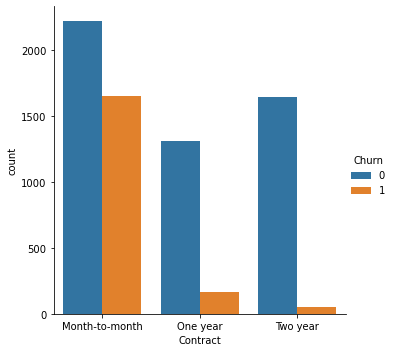

In [30]:
sns.catplot(data=cc, x="Contract", hue="Churn" , kind='count')

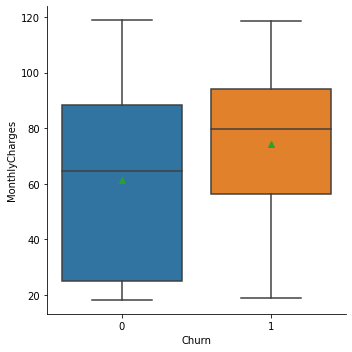

In [31]:
sns.catplot(data=cc,x= 'Churn' , y="MonthlyCharges" , kind='box', showmeans= True)

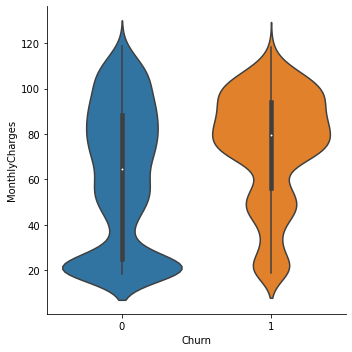

In [32]:
sns.catplot(data=cc,x= 'Churn' , y="MonthlyCharges" , kind='violin', showmeans= True)

<AxesSubplot:>

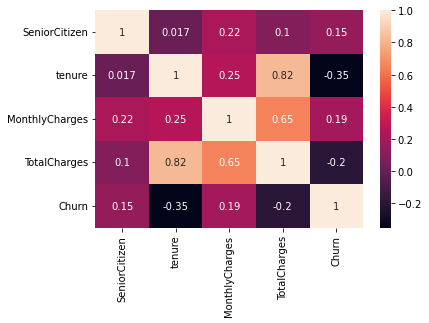

In [33]:
sns.heatmap(cc.corr(),annot=True )

<AxesSubplot:>

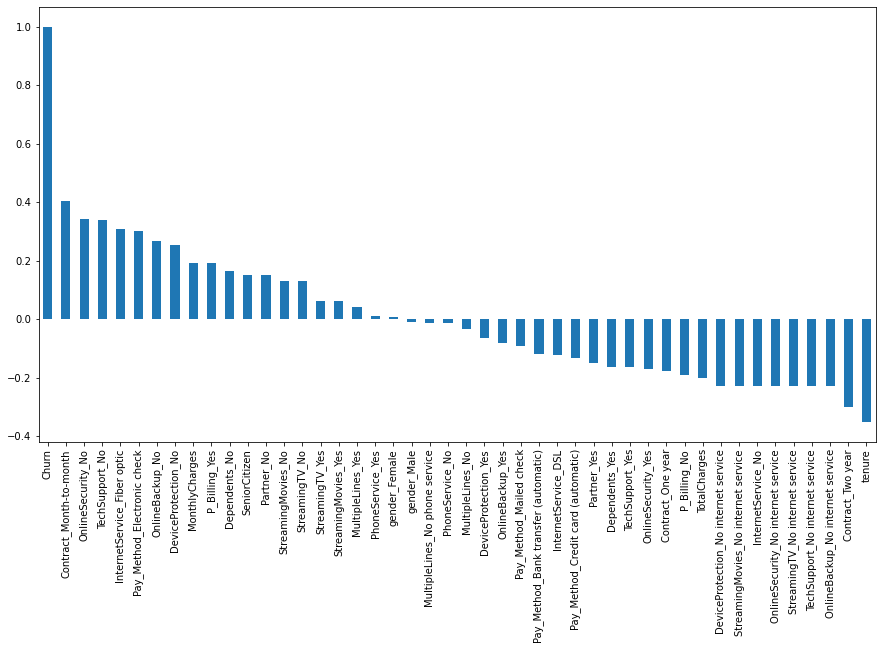

In [35]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

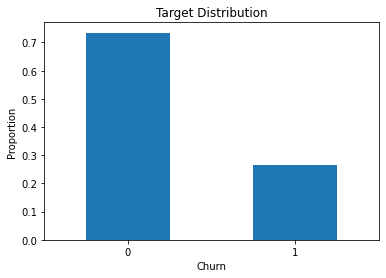

In [36]:
fig, ax = plt.subplots()
ax = cc['Churn'].value_counts(normalize=True).plot.bar()
ax.set_ylabel('Proportion')
ax.set_xlabel('Churn')
plt.xticks(rotation='horizontal')
ax.set_title('Target Distribution');

<AxesSubplot:>

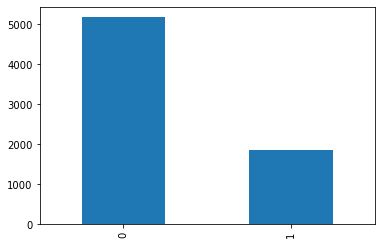

In [37]:
cc.Churn.value_counts().plot.bar()

<AxesSubplot:>

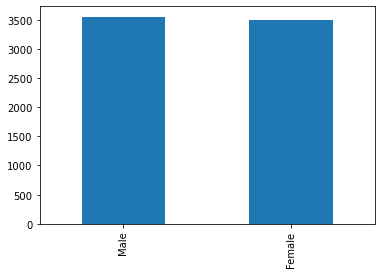

In [38]:
cc['gender'].value_counts().plot.bar()

<AxesSubplot:>

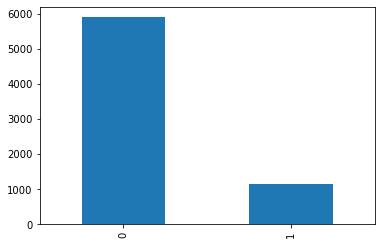

In [39]:
cc['SeniorCitizen'].value_counts().plot.bar()


Stacked barchart code gotten from kaggle search , but modified into a function

In [40]:
def stack_plot(cc,id_vars,value_vars,x,y,z,a,b):
    cc = pd.melt(cc, id_vars, value_vars)
    df3 = cc.groupby([x,y]).count().unstack()
    df3 = df3*100/len(cc)
    colors = ['#4D3425','#E4512B']
    ax = df3.loc[:,z].plot.bar(stacked=True, color=colors,
                                          figsize=(8,6),rot = 0,
                                         width = 0.2)

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel(a,size = 14)
    ax.set_xlabel('')
    ax.set_title(b,size = 14)
    ax.legend(loc = 'center',prop={'size':14})

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                    color = 'white',
                   weight = 'bold',
                   size = 14)


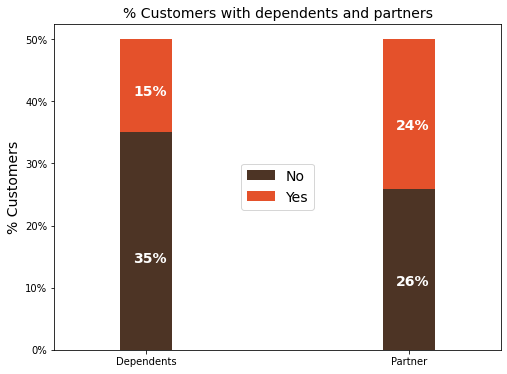

In [41]:
stack_plot(cc,'customerID',['Dependents','Partner'],'variable','value','customerID','% Customers','% Customers with dependents and partners')

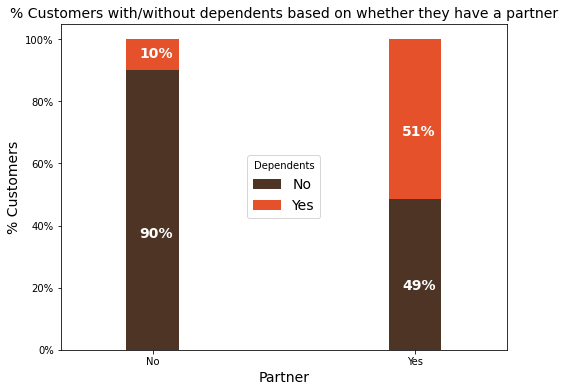

In [42]:
colors = ['#4D3425','#E4512B']
partner_dependents = cc.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

In [43]:
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,P_Billing_No,P_Billing_Yes,Pay_Method_Bank transfer (automatic),Pay_Method_Credit card (automatic),Pay_Method_Electronic check,Pay_Method_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


### Machine Learning 

* Trying Random Forest ,Xg_boost

In [44]:
cdf=df_dummies

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [46]:
X = cdf.drop(columns='Churn')

y = cdf['Churn']
X.shape, y.shape

((7043, 45), (7043,))

In [47]:
X.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,P_Billing_No,P_Billing_Yes,Pay_Method_Bank transfer (automatic),Pay_Method_Credit card (automatic),Pay_Method_Electronic check,Pay_Method_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [48]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0,
) 
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5282, 45), (5282,), (1761, 45), (1761,))

In [50]:
clf = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=11,)

In [51]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11)

In [52]:
predictions = clf.predict(X_test)

In [53]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
np.array(y_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
accuracy_score(y_test, predictions)

0.7898921067575241

In [56]:
clf.score(X_test, y_test)

0.7898921067575241

In [57]:
clf.score(X_train, y_train)

0.9142370314274896

In [58]:

clf.fit(X_train, y_train)
clf.score(X_test, y_test), clf.score(X_train, y_train)

(0.7938671209540034, 0.9113971980310488)

In [59]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,precision_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [60]:
param_grid = {
    'max_depth': [ 2, 5, 8, 11, 13 ],
    'min_samples_split': [ 10, 12, 3 ],
    'min_samples_leaf': [ 4, 8, 12]
}

In [61]:
list(ParameterGrid(param_grid))

[{'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10},
 {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 12},
 {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 3},
 {'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 10},
 {'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 12},
 {'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 3},
 {'max_depth': 2, 'min_samples_leaf': 12, 'min_samples_split': 10},
 {'max_depth': 2, 'min_samples_leaf': 12, 'min_samples_split': 12},
 {'max_depth': 2, 'min_samples_leaf': 12, 'min_samples_split': 3},
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10},
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 12},
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 3},
 {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 10},
 {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 12},
 {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 3

In [62]:
grid = GridSearchCV(
    clf, param_grid, scoring='balanced_accuracy', return_train_score=True
)

In [63]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=11),
             param_grid={'max_depth': [2, 5, 8, 11, 13],
                         'min_samples_leaf': [4, 8, 12],
                         'min_samples_split': [10, 12, 3]},
             return_train_score=True, scoring='balanced_accuracy')

In [64]:
gs_results = pd.DataFrame(grid.cv_results_)

In [65]:
gs_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [66]:
gs_results[
    ['param_max_depth', 'param_min_samples_split', 'mean_train_score', 
     'mean_test_score', 'rank_test_score'  ] 
].sort_values('mean_test_score', ascending=False)

,param_max_depth,param_min_samples_split,mean_train_score,mean_test_score,rank_test_score
32,11,3,0.759410,0.715780,1
23,8,3,0.743295,0.715648,2
18,8,10,0.752998,0.715234,3
31,11,12,0.758723,0.715226,4
21,8,10,0.743617,0.714881,5
28,11,12,0.782029,0.714713,6
29,11,3,0.790685,0.714324,7
38,13,3,0.802630,0.714061,8
35,11,3,0.744315,0.713933,9
24,8,10,0.737259,0.713865,10


In [67]:
precision_score(y_test,grid.predict(X_test))

0.6472303206997084

In [68]:
best_dt = grid.best_estimator_

In [69]:
some_participants = X_test.sample(5, random_state=5)

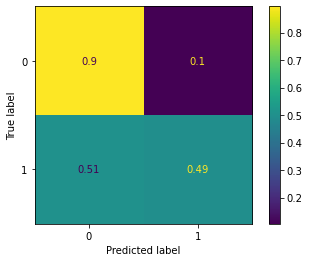

In [70]:
cm = confusion_matrix(
    y_test, predictions,normalize='true'
)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [72]:
from dtreeviz.trees import dtreeviz

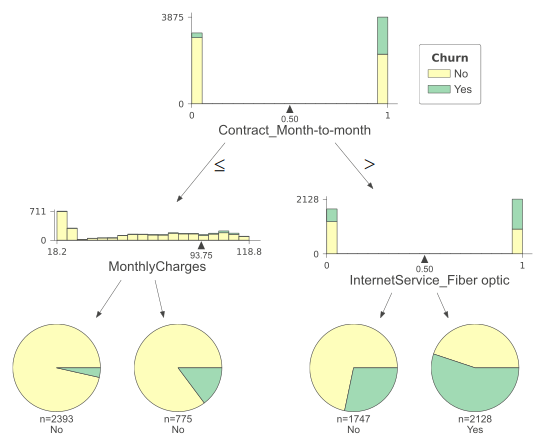

In [73]:
dtreeviz(
    dt, X, y, target_name='Churn', feature_names=X.columns.to_list(),
    class_names=['No', 'Yes'],
    scale=1.5
)

In [74]:
from sklearn.model_selection import GridSearchCV, ParameterGrid

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
X_gb = cdf.drop(columns='Churn')

f = cdf['Churn']
X_gb.shape, f.shape

((7043, 45), (7043,))

In [77]:
X_gb_train, X_gb_test, f_train, f_test = train_test_split(
    X_gb, f, test_size=0.35, random_state=0,
) 
X_gb_train.shape, f_train.shape, X_gb_test.shape, f_test.shape

((4577, 45), (4577,), (2466, 45), (2466,))

In [78]:
cdx = GradientBoostingClassifier(n_estimators=100,criterion='friedman_mse',max_depth=10,learning_rate=1.0)

In [79]:
cdx.fit(X_gb_train, f_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=10)

In [80]:
xgpredictions = cdx.predict(X_gb_test)

In [81]:
xgpredictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
np.array(f_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [83]:
f_test.to_numpy()

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [84]:
accuracy_score(f_test, xgpredictions)

0.778183292781833

#### feature engineering , adding residual columns from X & f 

In [85]:
(f_test.to_numpy()==xgpredictions)

array([ True,  True,  True, ..., False,  True,  True])

In [86]:
(f_test.to_numpy()==xgpredictions).sum()

1919

In [87]:
(f_test.to_numpy()==xgpredictions).sum() / len(f_test)

0.778183292781833

In [88]:
f_true = f_test
xgpredictions - f_true

2200    0
4627    0
3225    0
2828    0
3768    0
       ..
5753    0
4109    0
4106   -1
2760    0
2534    0
Name: Churn, Length: 2466, dtype: int64

In [89]:
np.abs(xgpredictions - f_true)

2200    0
4627    0
3225    0
2828    0
3768    0
       ..
5753    0
4109    0
4106    1
2760    0
2534    0
Name: Churn, Length: 2466, dtype: int64

In [90]:
np.mean(np.abs(xgpredictions - f_true))

0.22181670721816707

In [91]:
residual = cdx.predict(X_gb) - f
residual = pd.Series(residual).rename('residual')
residual.head()

0    0
1    0
2    0
3    0
4    0
Name: residual, dtype: int64

In [92]:
residual_abs = residual.abs().rename('residual_abs')
churn_res = pd.concat([ cc, residual, residual_abs ], axis='columns')
churn_res.sort_values('residual_abs', ascending=False)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,P_Billing,Pay_Method,MonthlyCharges,TotalCharges,Churn,residual,residual_abs
1985,8901-HJXTF,Female,0,Yes,Yes,12,No,No phone service,DSL,No,...,No,No,Month-to-month,No,Mailed check,29.20,309.10,1,-1,1
2378,2884-GBPFB,Female,0,Yes,No,35,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.30,2416.55,1,-1,1
624,1009-IRMNA,Female,0,No,No,7,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.00,137.60,1,-1,1
4174,3285-UCQVC,Female,0,No,No,37,No,No phone service,DSL,No,...,No,No,Month-to-month,No,Credit card (automatic),28.60,973.55,1,-1,1
629,4554-YGZIH,Male,1,Yes,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,Month-to-month,No,Credit card (automatic),90.05,4547.25,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,1475-VWVDO,Male,0,No,No,7,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,74.90,490.55,0,0,0
2446,9492-TOKRI,Female,0,No,No,18,Yes,Yes,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Credit card (automatic),90.00,1527.35,1,0,0
2445,0187-WZNAB,Female,0,Yes,Yes,27,Yes,No,Fiber optic,Yes,...,No,No,Month-to-month,No,Mailed check,74.40,1972.35,0,0,0
2444,1254-IZEYF,Female,1,No,No,31,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.95,3186.65,1,0,0


In [93]:
cdx.score(X_gb_test, f_test)

0.778183292781833

In [94]:
cdx.score(X_gb_train, f_train)

0.996941227878523

In [95]:
# clf = RandomForestClassifier()
# # knnc = KNeighborsClassifier(7)
cdx.fit(X_gb_train, f_train)
cdx.score(X_gb_test, f_test), cdx.score(X_gb_train, f_train)

(0.7757502027575021, 0.996941227878523)

In [96]:
precision_score(f_test,grid.predict(X_gb_test))

0.6880165289256198

In [97]:
best_dt = grid.best_estimator_

In [98]:
some_participants = X_gb_test.sample(5, random_state=5)

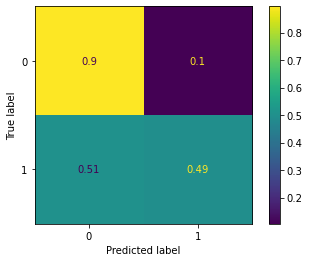

In [99]:
cgb = confusion_matrix(
    f_test, xgpredictions,normalize='true'
)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#### CHECKING FEATURE IMPORTANCE

In [100]:
from eli5.sklearn import PermutationImportance
import eli5

In [101]:
cdx.feature_importances_

array([2.01234886e-02, 1.20232597e-01, 1.86186070e-01, 2.03699258e-01,
       1.05208987e-02, 6.60589449e-03, 8.05243388e-03, 1.32585361e-02,
       6.94889782e-03, 7.26242746e-03, 6.43084648e-06, 1.59606373e-03,
       7.76643991e-03, 6.41624802e-04, 9.82396261e-03, 6.48693480e-03,
       4.98341777e-02, 2.51582131e-06, 8.52878798e-03, 1.21616321e-06,
       7.10732596e-03, 1.11414683e-02, 5.62514998e-07, 9.36833035e-03,
       7.08169634e-03, 2.70963735e-09, 5.66866939e-03, 9.42576660e-03,
       4.46151927e-06, 5.57396062e-03, 8.89136583e-03, 1.81504434e-05,
       4.99637382e-03, 5.43223132e-03, 6.40893213e-04, 4.02192990e-03,
       1.87168629e-01, 2.29480444e-03, 2.93161375e-03, 1.24632050e-02,
       4.90815556e-03, 7.44007690e-03, 6.41137979e-03, 1.89041376e-02,
       1.05261531e-02])

In [102]:
X_gb_train.columns.tolist()

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Female',
 'gender_Male',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'P_Billing_No',
 'P_Billing_Yes',
 'Pay_Method_Bank transfer (automatic)'

In [103]:
def plot_rf_feat_imp_barh(rf, feat_names, ax=None, top_feat_k=10, style_kws={}):
    """ """
    if ax is None:
        fig, ax = plt.subplots()
    
    return pd.Series(
        rf.feature_importances_, 
        index=feat_names
    ).sort_values().tail(top_feat_k).plot.barh(**style_kws)

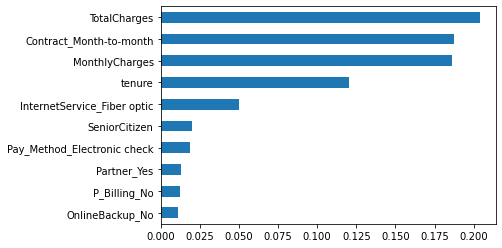

In [104]:
plot_rf_feat_imp_barh(cdx, X_gb_test.columns);